In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=None

In [3]:
df = pd.read_csv('../datos/datos_da_ba.csv', index_col = 0)

In [4]:
df.head(3)

,age,gender,country,continent,job_title,work_activities,size_DA_dept,years_programming,first_language_rec,dev_language,primary_data_tool,IDE,big_data,BI_tools,visualisation,ML,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_C++,dev_language_Java,dev_language_MATLAB,dev_language_None,dev_language_C,dev_language_SQL,dev_language_Bash,dev_language_R,dev_language_Javascript,dev_language_Python,dev_language_Julia,dev_language_Other,dev_language_Swift,IDE_Jupyter Notebook,IDE_Sublime Text,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),IDE_Spyder,IDE_None,IDE_Notepad++,IDE_RStudio,IDE_Visual Studio,IDE_Visual Studio Code (VSCode),IDE_Vim / Emacs,IDE_PyCharm,IDE_MATLAB,IDE_Other,visualisation_Matplotlib,visualisation_Shiny,visualisation_None,visualisation_Seaborn,visualisation_Bokeh,visualisation_Leaflet / Folium,visualisation_Altair,visualisation_D3 js,visualisation_Plotly / Plotly Express,visualisation_Ggplot / ggplot2,visualisation_Geoplotlib,visualisation_Other,work_activities_Analyze and understand data to influence product or business decisions,work_activities_None of these activities are an important part of my role at work,work_activities_Experimentation and iteration to improve existing ML models,work_activities_Build and/or run a machine learning service that operationally improves my product or workflows,work_activities_Build and/or run the data infrastructure that my business uses for storing; analyzing; and operationalizing data,work_activities_Do research that advances the state of the art of machine learning,work_activities_Build prototypes to explore applying machine learning to new areas,work_activities_Other,big_data_Snowflake,big_data_Oracle Database,big_data_MySQL,big_data_Google Cloud BigQuery,big_data_Microsoft SQL Server,big_data_None,big_data_Google Cloud BigTable,big_data_Amazon RDS,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud SQL,big_data_Other,big_data_IBM Db2,big_data_Amazon DynamoDB,big_data_Google Cloud Spanner,big_data_Google Cloud Firestore,big_data_Amazon Redshift,big_data_Microsoft Azure SQL Database,big_data_PostgreSQL,big_data_SQLite,big_data_MongoDB,big_data_Amazon Aurora,BI_tools_SAP Analytics Cloud,BI_tools_TIBCO Spotfire,BI_tools_None,BI_tools_Salesforce,BI_tools_Amazon QuickSight,BI_tools_Microsoft Power BI,BI_tools_Qlik,BI_tools_Tableau,BI_tools_Thoughtspot,BI_tools_Google Data Studio,BI_tools_Looker,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau CRM,BI_tools_Domo,BI_tools_Alteryx,BI_tools_Sisense,BI_tools_Other
16,50-54,Man,Belgium,Europe,Data Analyst,Analyze and understand data to influence produ...,5-9,20+ years,Python,"Python, SQL","Local development environments (RStudio, Jupyt...","Jupyter (JupyterLab; Jupyter Notebooks; etc) ,...",NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express",1-2 years,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,22-24,Nonbinary,United States of America,America,Data Analyst,Na

In [5]:
df.isnull().sum()

age                        0
gender                     0
country                    0
continent                  0
job_title                  0
                        ... 
BI_tools_Tableau CRM    1568
BI_tools_Domo           1568
BI_tools_Alteryx        1568
BI_tools_Sisense        1568
BI_tools_Other          1568
Length: 127, dtype: int64

In [6]:
df['dev_language'].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript', nan,
       'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javascript', 'Python, S

In [14]:
df.columns

Index(['age', 'gender', 'country', 'continent', 'job_title', 'work_activities',
       'size_DA_dept', 'years_programming', 'first_language_rec',
       'dev_language',
       ...
       'BI_tools_Tableau', 'BI_tools_Thoughtspot',
       'BI_tools_Google Data Studio', 'BI_tools_Looker',
       'BI_tools_Microsoft Azure Synapse', 'BI_tools_Tableau CRM',
       'BI_tools_Domo', 'BI_tools_Alteryx', 'BI_tools_Sisense',
       'BI_tools_Other'],
      dtype='object', length=127)

In [7]:
for col in df.columns:
    print(col)

age
gender
country
continent
job_title
work_activities
size_DA_dept
years_programming
first_language_rec
dev_language
primary_data_tool
IDE
big_data
BI_tools
visualisation
ML
notebooks_KaggleNotebooks
notebooks_ColabNotebooks
notebooks_AzureNotebooks
notebooks_Paperspace/Gradient
notebooks_Binder/JupyterHub
notebooks_CodeOcean
notebooks_IBMWatsonStudio
notebooks_AmazonSagemakerStudioNotebooks
notebooks_AmazonEMRNotebooks
notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI)
notebooks_GoogleCloudDatalab
notebooks_DatabricksCollaborativeNotebooks
notebooks_Zeppelin/ZeplNotebooks
notebooks_DeepnoteNotebooks
notebooks_ObservableNotebooks
notebooks_None
notebooks_Other
sharing_PlotlyDash
sharing_Streamlit
sharing_NBViewer
sharing_GitHub
sharing_Personalblog
sharing_Kaggle
sharing_Colab
sharing_Shiny
sharing_does_not_share
sharing_Other
dev_language_C++
dev_language_Java
dev_language_MATLAB
dev_language_None
dev_language_C
dev_language_SQL
dev_language_Bash
dev_language_R
dev_language_Javascri

In [8]:
df_dev_languages = df.loc[:, 'dev_language_C++' : 'dev_language_Swift'].sum().reset_index()
df_dev_languages

,index,0
0,dev_language_C++,288.0
1,dev_language_Java,505.0
2,dev_language_MATLAB,230.0
3,dev_language_None,59.0
4,dev_language_C,388.0
5,dev_language_SQL,1866.0
6,dev_language_Bash,131.0
7,dev_language_R,928.0
8,dev_language_Javascript,327.0
9,dev_language_Python,2465.0


In [9]:
df_dev_languages.columns = ['dev_language', 'number_of_users']

df_dev_languages

,dev_language,number_of_users
0,dev_language_C++,288.0
1,dev_language_Java,505.0
2,dev_language_MATLAB,230.0
3,dev_language_None,59.0
4,dev_language_C,388.0
5,dev_language_SQL,1866.0
6,dev_language_Bash,131.0
7,dev_language_R,928.0
8,dev_language_Javascript,327.0
9,dev_language_Python,2465.0


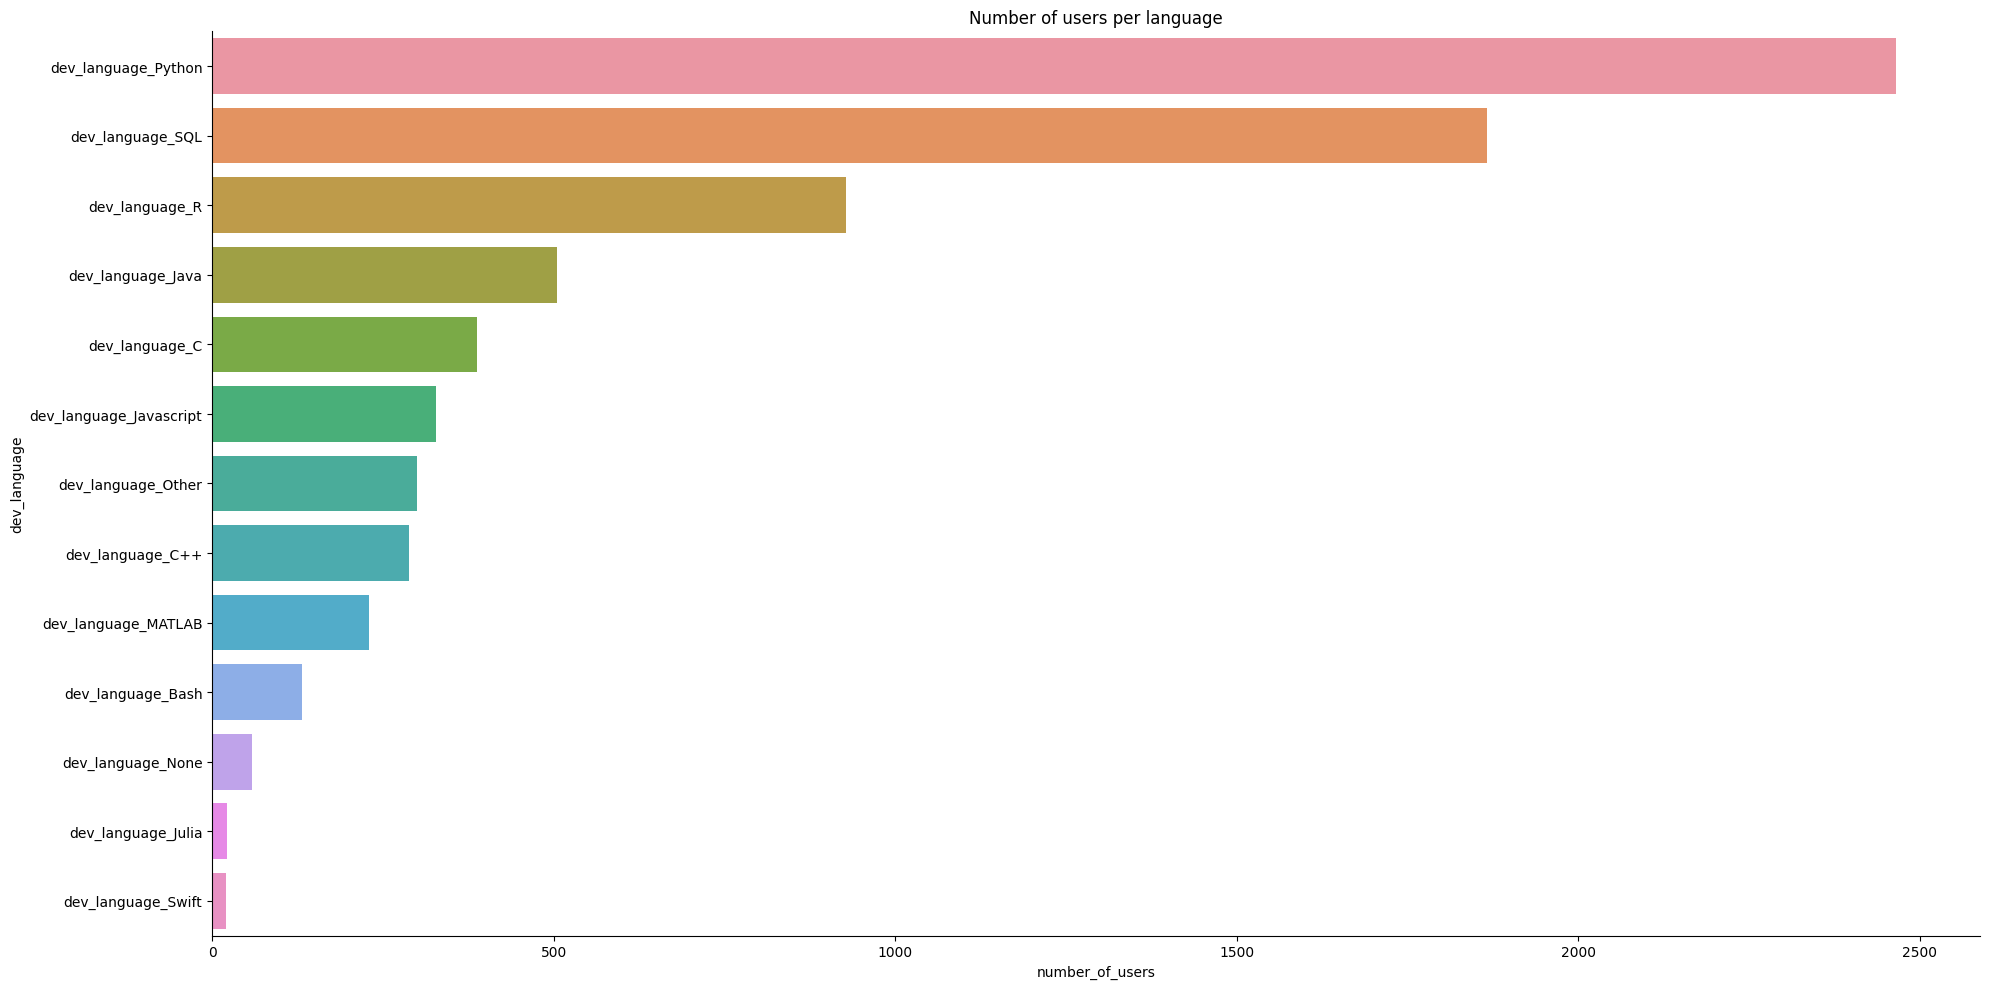

In [13]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='dev_language', x= 'number_of_users', data=df_dev_languages, order= df_dev_languages.sort_values('number_of_users', ascending= False)['dev_language'])

fig.set_title('Number of users per language') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [15]:
for col in df.columns:
    print(col)

age
gender
country
continent
job_title
work_activities
size_DA_dept
years_programming
first_language_rec
dev_language
primary_data_tool
IDE
big_data
BI_tools
visualisation
ML
notebooks_KaggleNotebooks
notebooks_ColabNotebooks
notebooks_AzureNotebooks
notebooks_Paperspace/Gradient
notebooks_Binder/JupyterHub
notebooks_CodeOcean
notebooks_IBMWatsonStudio
notebooks_AmazonSagemakerStudioNotebooks
notebooks_AmazonEMRNotebooks
notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI)
notebooks_GoogleCloudDatalab
notebooks_DatabricksCollaborativeNotebooks
notebooks_Zeppelin/ZeplNotebooks
notebooks_DeepnoteNotebooks
notebooks_ObservableNotebooks
notebooks_None
notebooks_Other
sharing_PlotlyDash
sharing_Streamlit
sharing_NBViewer
sharing_GitHub
sharing_Personalblog
sharing_Kaggle
sharing_Colab
sharing_Shiny
sharing_does_not_share
sharing_Other
dev_language_C++
dev_language_Java
dev_language_MATLAB
dev_language_None
dev_language_C
dev_language_SQL
dev_language_Bash
dev_language_R
dev_language_Javascri

In [16]:
lista_prefijos = ['IDE', 'notebooks', 'visualisation', 'big_data', 'BI_tools', 'work_activities', 'sharing', 'dev_language']

In [ ]:
diccionario =  {}
for i in lista_prefijos:
    lista_col = []
    for col in df.columns:
        if i in col:
            lista_col.append(col)
        diccionario[i] = df.loc[:, lista_col[0]: lista_col[-1]].sum().reset_index()

In [20]:
diccionario

{'IDE':                                                index       0
 0                                   dev_language_C++   288.0
 1                                  dev_language_Java   505.0
 2                                dev_language_MATLAB   230.0
 3                                  dev_language_None    59.0
 4                                     dev_language_C   388.0
 5                                   dev_language_SQL  1866.0
 6                                  dev_language_Bash   131.0
 7                                     dev_language_R   928.0
 8                            dev_language_Javascript   327.0
 9                                dev_language_Python  2465.0
 10                                dev_language_Julia    21.0
 11                                dev_language_Other   300.0
 12                                dev_language_Swift    20.0
 13                              IDE_Jupyter Notebook  2149.0
 14                                  IDE_Sublime Text   259.0
 

In [24]:
df_visualisation = df.loc[:, 'visualisation_Matplotlib' : 'visualisation_Other'].sum().reset_index()
df_visualisation

,index,0
0,visualisation_Matplotlib,1984.0
1,visualisation_Shiny,235.0
2,visualisation_None,420.0
3,visualisation_Seaborn,1559.0
4,visualisation_Bokeh,138.0
5,visualisation_Leaflet / Folium,94.0
6,visualisation_Altair,50.0
7,visualisation_D3 js,105.0
8,visualisation_Plotly / Plotly Express,796.0
9,visualisation_Ggplot / ggplot2,830.0


In [26]:
df_visualisation.columns = ['visualisation_software', 'number_of_users']
df_visualisation

,visualisation_software,number_of_users
0,visualisation_Matplotlib,1984.0
1,visualisation_Shiny,235.0
2,visualisation_None,420.0
3,visualisation_Seaborn,1559.0
4,visualisation_Bokeh,138.0
5,visualisation_Leaflet / Folium,94.0
6,visualisation_Altair,50.0
7,visualisation_D3 js,105.0
8,visualisation_Plotly / Plotly Express,796.0
9,visualisation_Ggplot / ggplot2,830.0


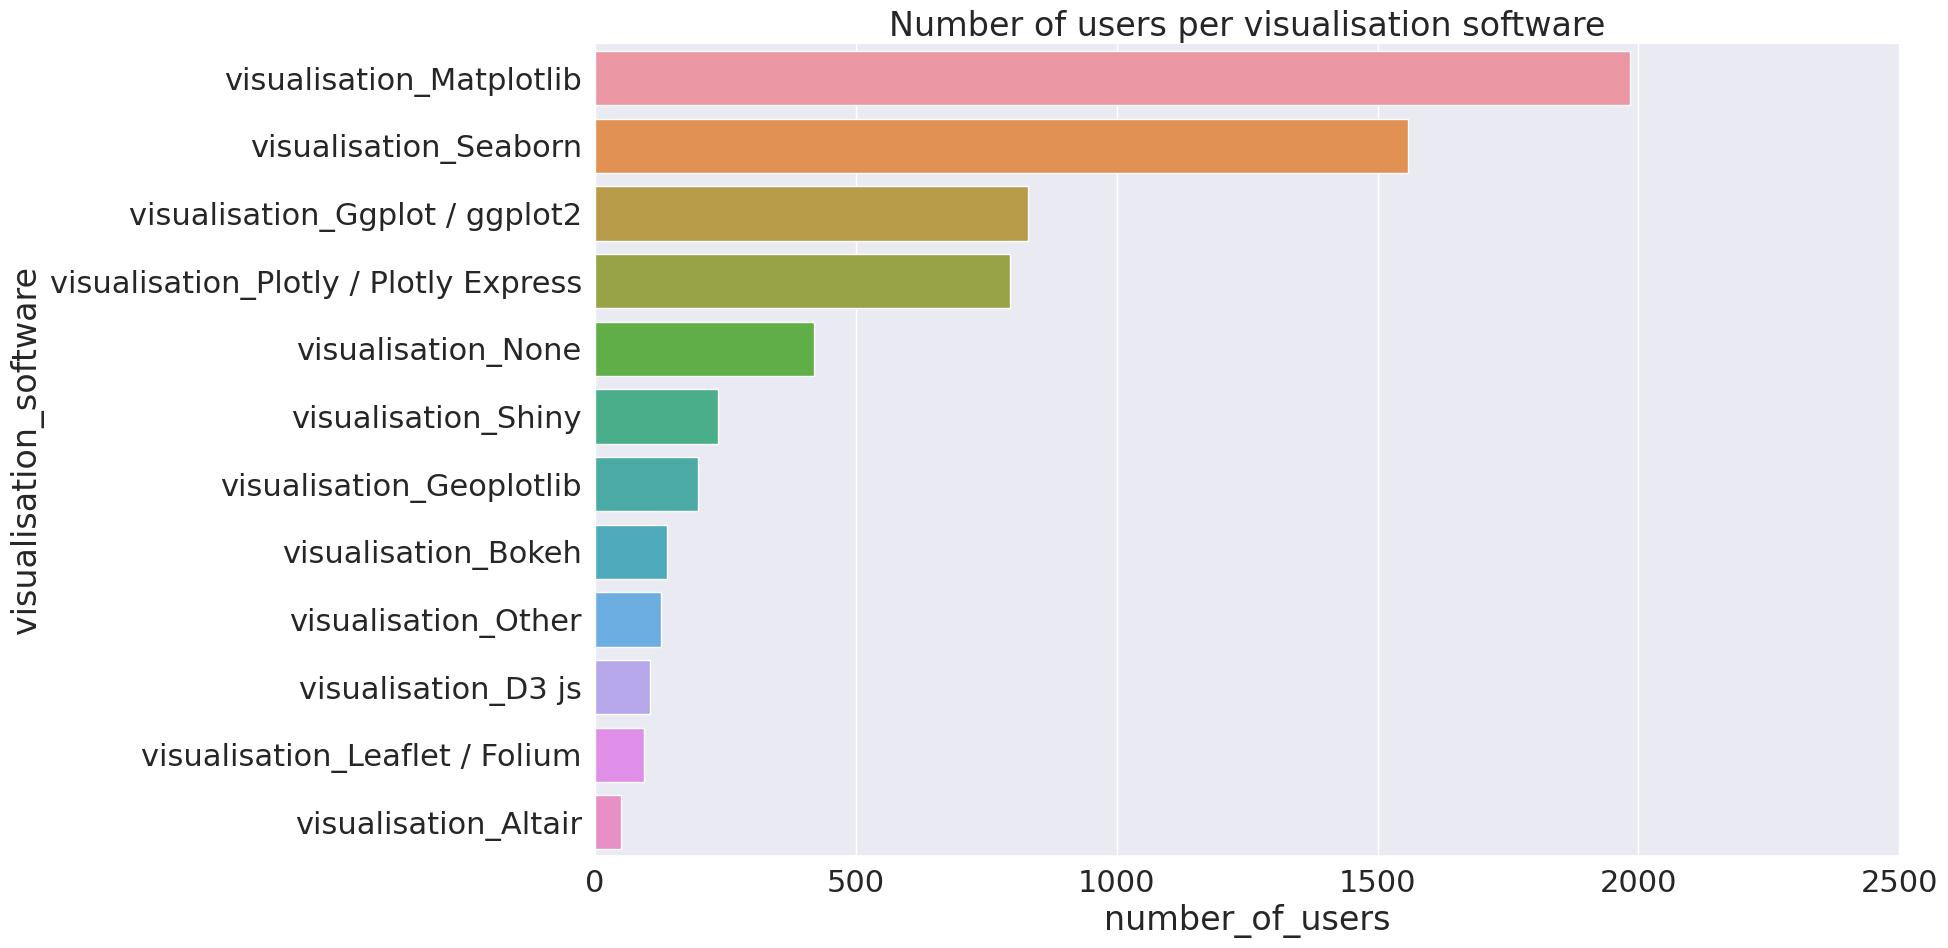

In [33]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='visualisation_software', x= 'number_of_users', 
                data=df_visualisation, 
                order= df_visualisation.sort_values('number_of_users', 
                ascending= False)['visualisation_software'])

fig.set_title('Number of users per visualisation software') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

# sns.set(font_scale=2)

plt.tight_layout()

plt.show()

In [35]:
df_notebooks = df.loc[:, 'notebooks_KaggleNotebooks' : 'notebooks_Other'].sum().reset_index()
df_notebooks

/tmp/ipykernel_8752/2409738789.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_notebooks = df.loc[:, 'notebooks_KaggleNotebooks' : 'notebooks_Other'].sum().reset_index()


,index,0


In [36]:
# PENDIENTES GRÁFICAS DE NOTEBOOKS Y SHARINGS

,index,0


In [37]:
df_ide = df.loc[:, 'IDE_Jupyter Notebook' : 'IDE_Other'].sum().reset_index()
df_ide

,index,0
0,IDE_Jupyter Notebook,2149.0
1,IDE_Sublime Text,259.0
2,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),634.0
3,IDE_Spyder,476.0
4,IDE_None,90.0
5,IDE_Notepad++,539.0
6,IDE_RStudio,820.0
7,IDE_Visual Studio,1144.0
8,IDE_Visual Studio Code (VSCode),865.0
9,IDE_Vim / Emacs,86.0


In [38]:
df_ide.columns = ['IDE_software', 'number_of_users']
df_ide

,IDE_software,number_of_users
0,IDE_Jupyter Notebook,2149.0
1,IDE_Sublime Text,259.0
2,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),634.0
3,IDE_Spyder,476.0
4,IDE_None,90.0
5,IDE_Notepad++,539.0
6,IDE_RStudio,820.0
7,IDE_Visual Studio,1144.0
8,IDE_Visual Studio Code (VSCode),865.0
9,IDE_Vim / Emacs,86.0


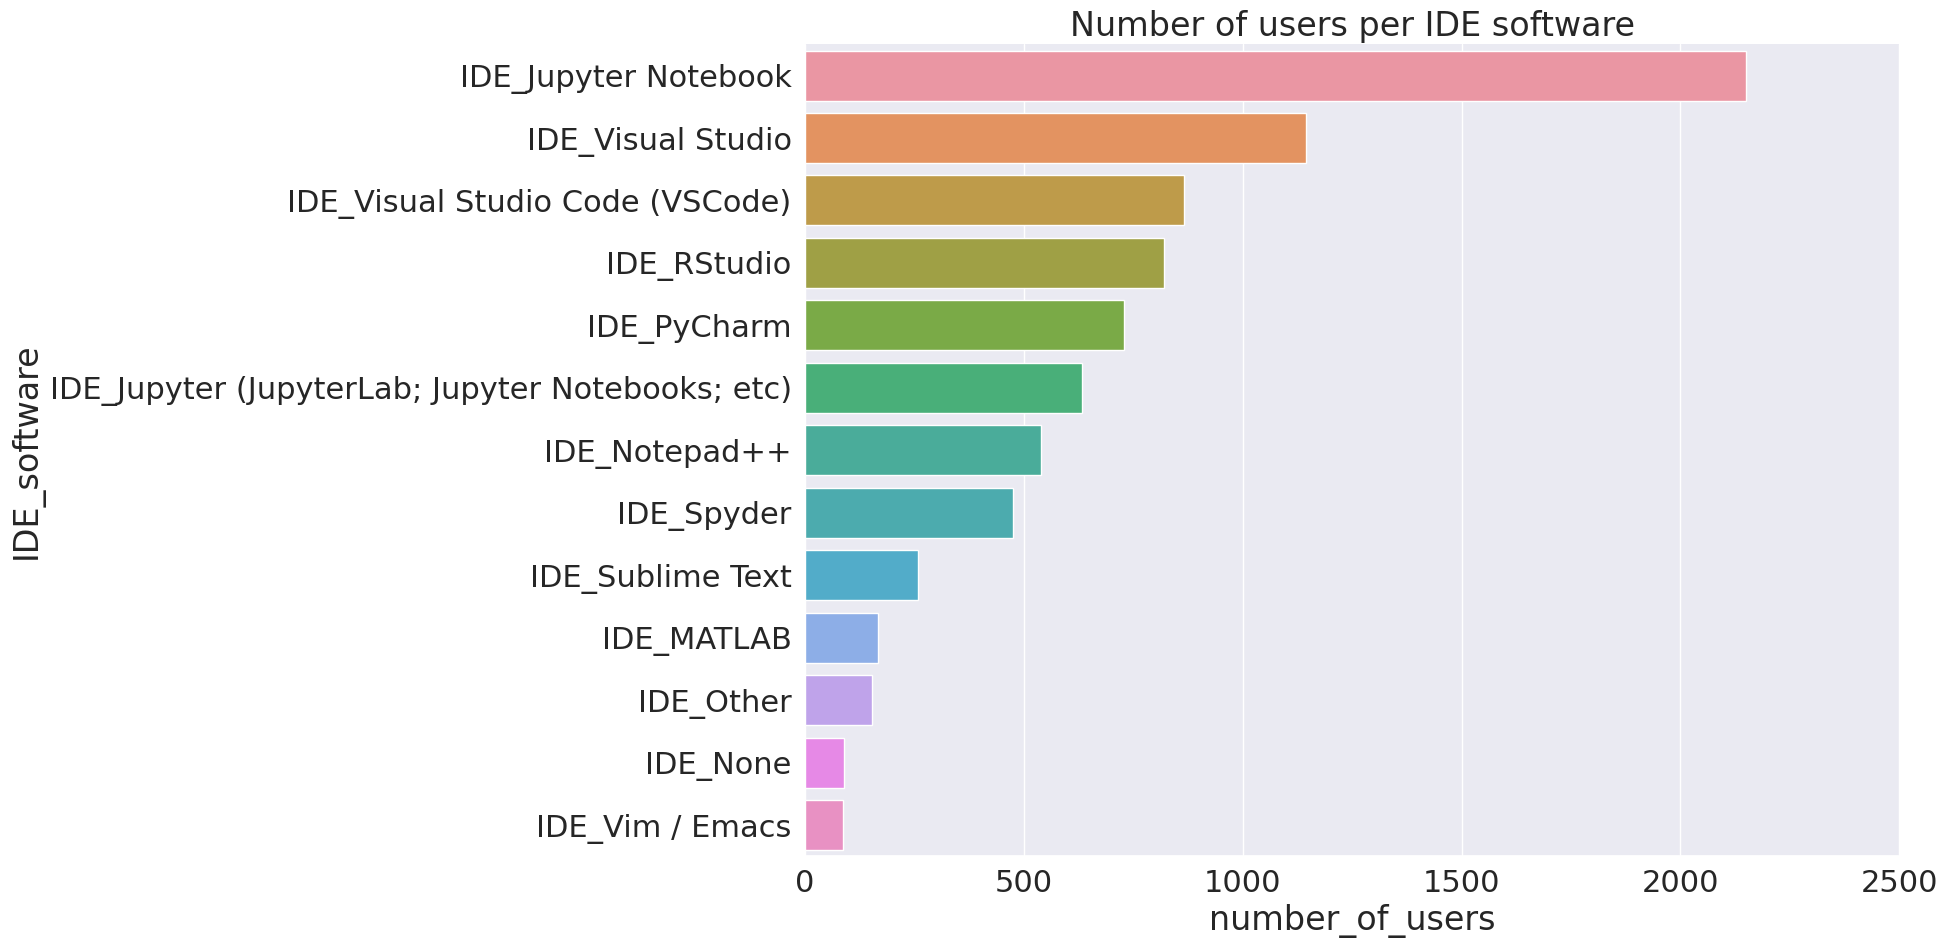

In [39]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='IDE_software', x= 'number_of_users', data=df_ide, order= df_ide.sort_values('number_of_users', ascending= False)['IDE_software'])

fig.set_title('Number of users per IDE software') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [40]:
df_big_data = df.loc[:, 'big_data_Snowflake' : 'big_data_Amazon Aurora'].sum().reset_index()
df_big_data

,index,0
0,big_data_Snowflake,79.0
1,big_data_Oracle Database,217.0
2,big_data_MySQL,685.0
3,big_data_Google Cloud BigQuery,169.0
4,big_data_Microsoft SQL Server,442.0
5,big_data_None,349.0
6,big_data_Google Cloud BigTable,65.0
7,big_data_Amazon RDS,62.0
8,big_data_Microsoft Azure Cosmos DB,60.0
9,big_data_Google Cloud SQL,120.0


In [41]:
df_big_data.columns = ['BigData_software', 'number_of_users']
df_big_data

,BigData_software,number_of_users
0,big_data_Snowflake,79.0
1,big_data_Oracle Database,217.0
2,big_data_MySQL,685.0
3,big_data_Google Cloud BigQuery,169.0
4,big_data_Microsoft SQL Server,442.0
5,big_data_None,349.0
6,big_data_Google Cloud BigTable,65.0
7,big_data_Amazon RDS,62.0
8,big_data_Microsoft Azure Cosmos DB,60.0
9,big_data_Google Cloud SQL,120.0


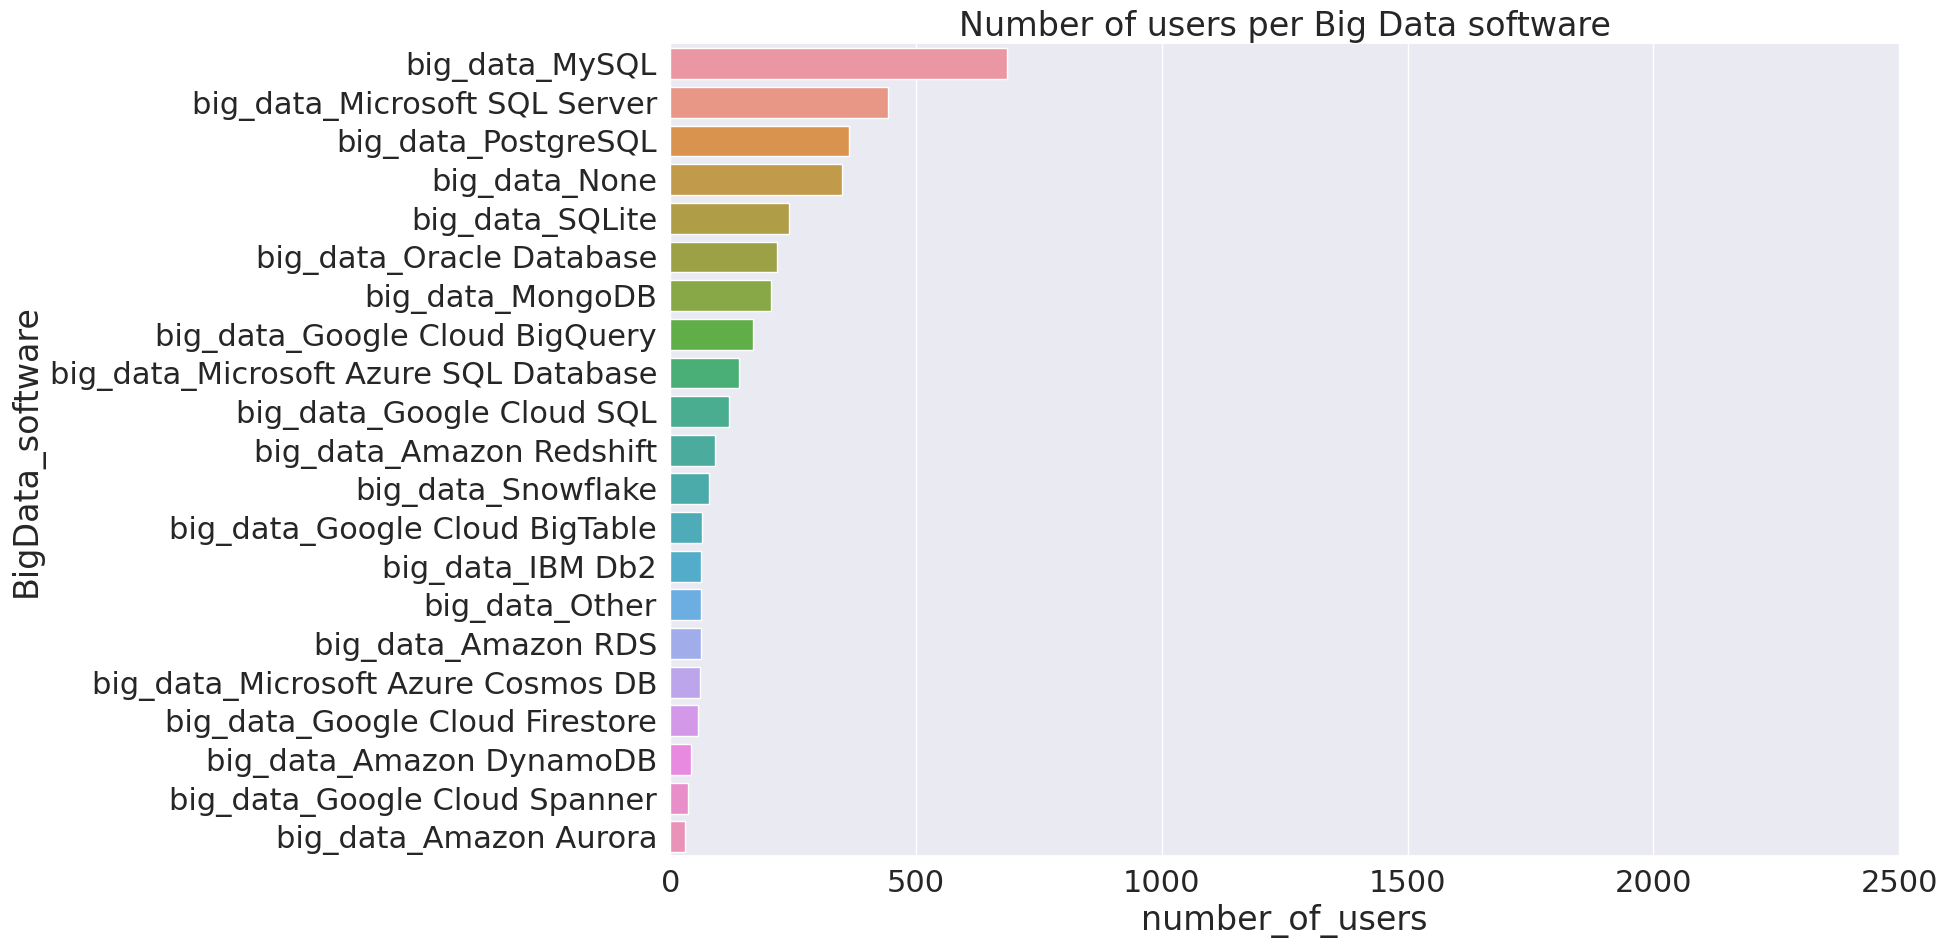

In [42]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='BigData_software', x= 'number_of_users', data=df_big_data, order= df_big_data.sort_values('number_of_users', ascending= False)['BigData_software'])

fig.set_title('Number of users per Big Data software') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [43]:
df_bi = df.loc[:, 'BI_tools_SAP Analytics Cloud' : 'BI_tools_Other'].sum().reset_index()
df_bi

,index,0
0,BI_tools_SAP Analytics Cloud,59.0
1,BI_tools_TIBCO Spotfire,26.0
2,BI_tools_None,395.0
3,BI_tools_Salesforce,87.0
4,BI_tools_Amazon QuickSight,34.0
5,BI_tools_Microsoft Power BI,673.0
6,BI_tools_Qlik,118.0
7,BI_tools_Tableau,749.0
8,BI_tools_Thoughtspot,12.0
9,BI_tools_Google Data Studio,217.0


In [44]:
df_bi.columns = ['BI_tools', 'number_of_users']

df_bi

,BI_tools,number_of_users
0,BI_tools_SAP Analytics Cloud,59.0
1,BI_tools_TIBCO Spotfire,26.0
2,BI_tools_None,395.0
3,BI_tools_Salesforce,87.0
4,BI_tools_Amazon QuickSight,34.0
5,BI_tools_Microsoft Power BI,673.0
6,BI_tools_Qlik,118.0
7,BI_tools_Tableau,749.0
8,BI_tools_Thoughtspot,12.0
9,BI_tools_Google Data Studio,217.0


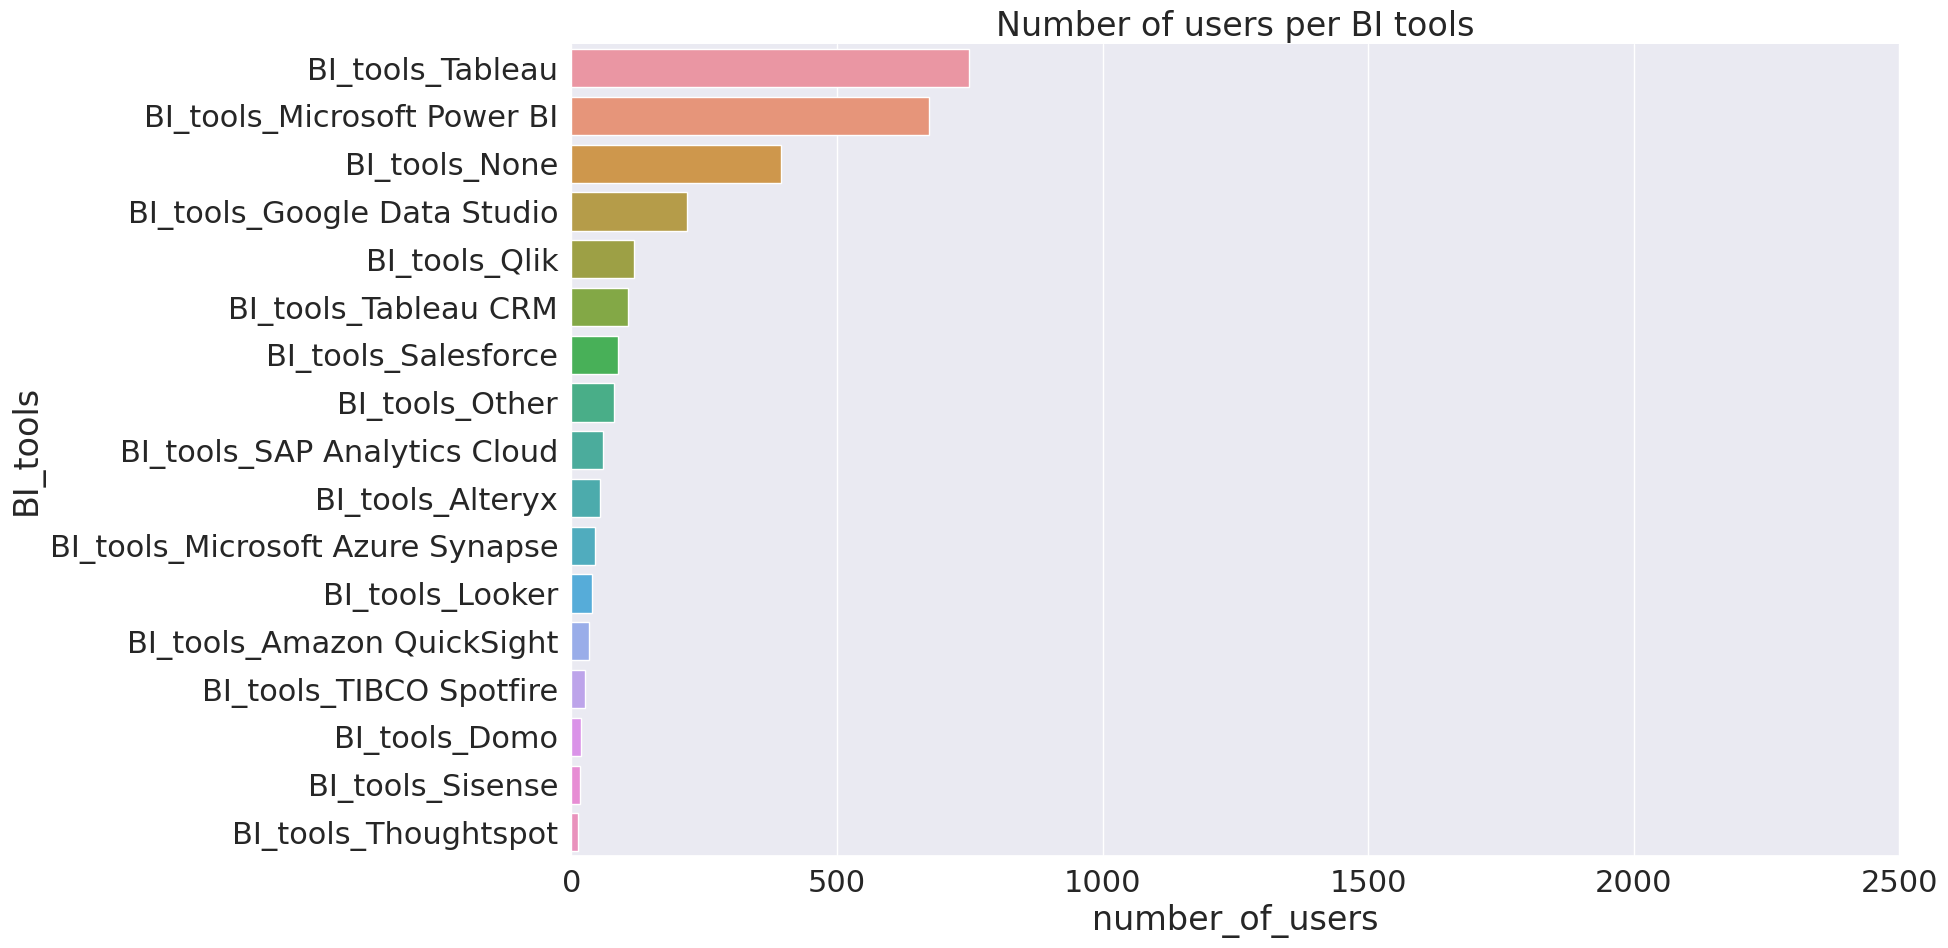

In [45]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='BI_tools', x= 'number_of_users', data=df_bi, order= df_bi.sort_values('number_of_users', ascending= False)['BI_tools'])

fig.set_title('Number of users per BI tools') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [46]:
df_work_acts = df.loc[:, 'work_activities_Analyze and understand data to influence product or business decisions' : 'work_activities_Other'].sum().reset_index()
df_work_acts

,index,0
0,work_activities_Analyze and understand data to...,2343.0
1,work_activities_None of these activities are a...,274.0
2,work_activities_Experimentation and iteration ...,398.0
3,work_activities_Build and/or run a machine lea...,446.0
4,work_activities_Build and/or run the data infr...,957.0
5,work_activities_Do research that advances the ...,344.0
6,work_activities_Build prototypes to explore ap...,571.0
7,work_activities_Other,121.0


In [47]:
df_work_acts.columns = ['work_activities', 'number_of_users']

df_work_acts

,work_activities,number_of_users
0,work_activities_Analyze and understand data to...,2343.0
1,work_activities_None of these activities are a...,274.0
2,work_activities_Experimentation and iteration ...,398.0
3,work_activities_Build and/or run a machine lea...,446.0
4,work_activities_Build and/or run the data infr...,957.0
5,work_activities_Do research that advances the ...,344.0
6,work_activities_Build prototypes to explore ap...,571.0
7,work_activities_Other,121.0


ConversionError: Failed to convert value(s) to axis units: ['Analyze data', 'Build/run data infrastructure', 'Build ML prototypes', 'Build/run ML service', 'ML improvement', 'ML research', 'None', 'Other']

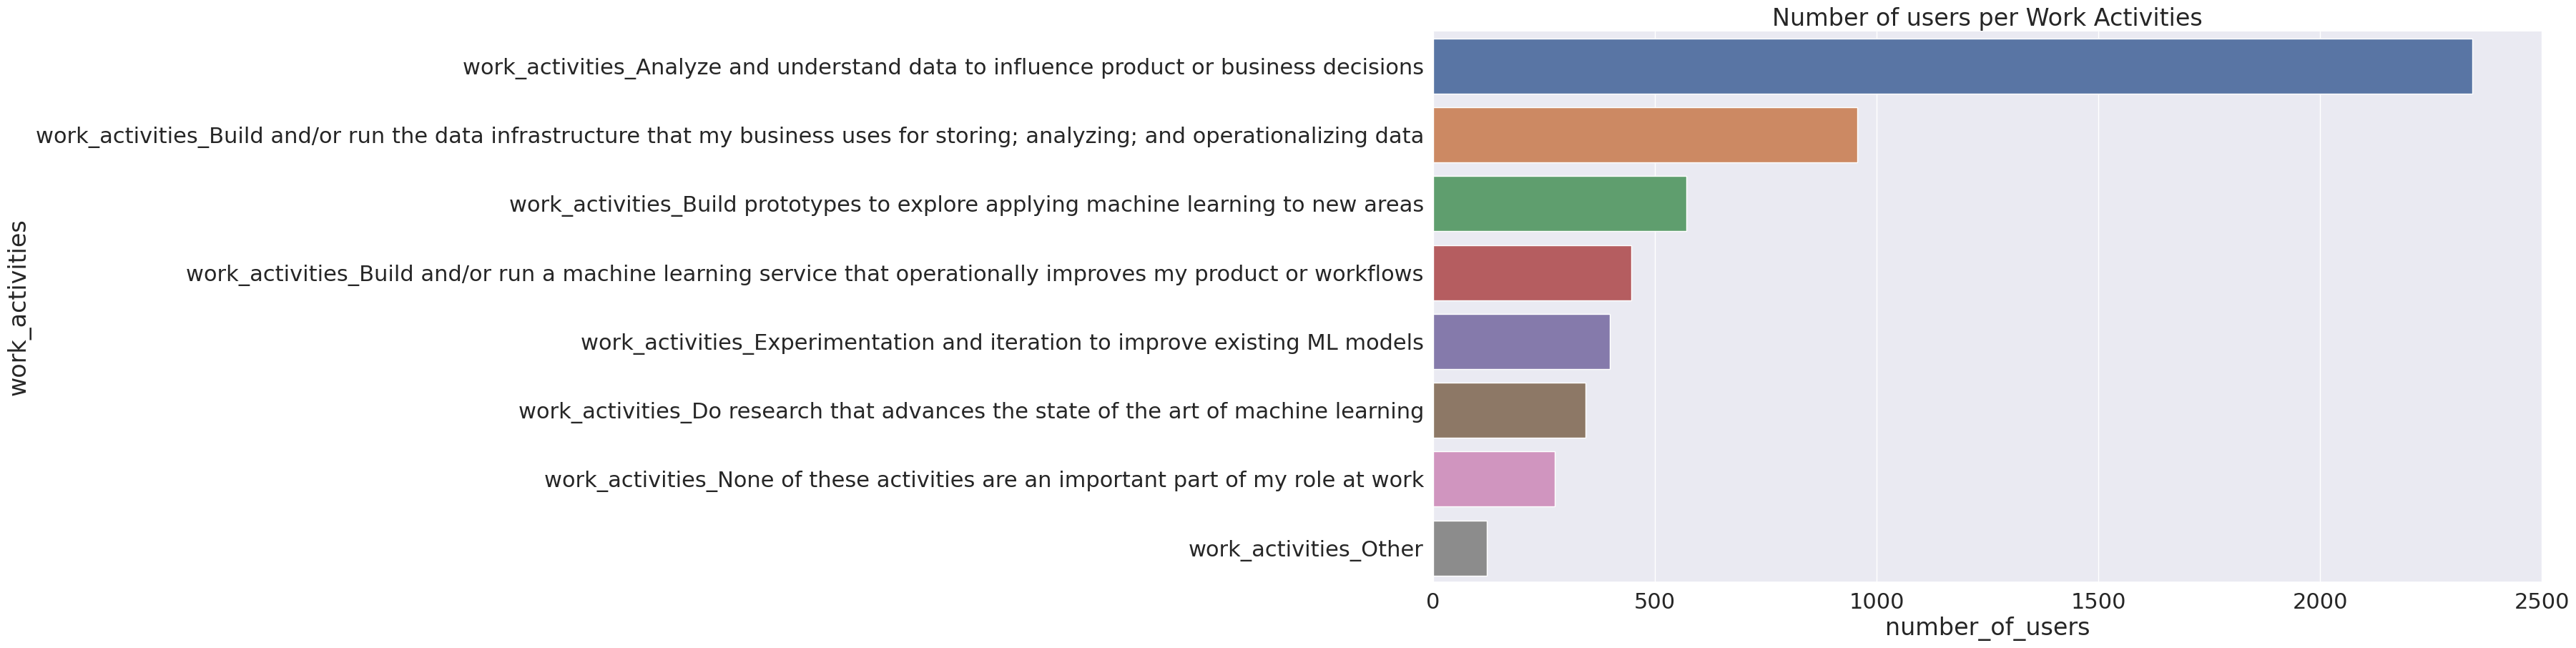

In [50]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='work_activities', x= 'number_of_users', data=df_work_acts, order= df_work_acts.sort_values('number_of_users', ascending= False)['work_activities'])

fig.set_title('Number of users per Work Activities') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)
fig.set_yticks(ticks = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"], rotation = 45)

plt.tight_layout()

plt.show()